In [1]:
import numpy as np
from typing import Tuple
np.seterr(divide = 'ignore') 


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def gaussian(mean, std, data):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((data - mean) / std)**2)
def likelihood(params, data):
    mean, std = params
    log_likelihood = -.5 * np.sum(np.log(gaussian(mean, std, data)))
    return -log_likelihood

In [3]:
def mle_search(data)->Tuple:
    best_params:Tuple = ()
    best_likelihood = -np.inf
    
    mean_range = np.linspace(min(data), max(data), 100)
    std_range = np.linspace(.1, max(data) - min(data), 100)
    
    for mean in mean_range:
        for std in std_range:
            current_params = (mean, std)
            current_likelihood = likelihood(current_params, data)
            
            if current_likelihood > best_likelihood:
                best_likelihood = current_likelihood
                best_params = current_params
    return best_params

In [4]:
data = np.random.normal(loc=10, scale=5, size=100)
params:Tuple = mle_search(data)
data_pre = np.random.normal(loc=params[0], scale=params[1], size=100)

y = np.array([gaussian(10, 5, x) for x in data])
y_pred = np.array([gaussian(data_pre[0], data_pre[1], x) for x in data_pre])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


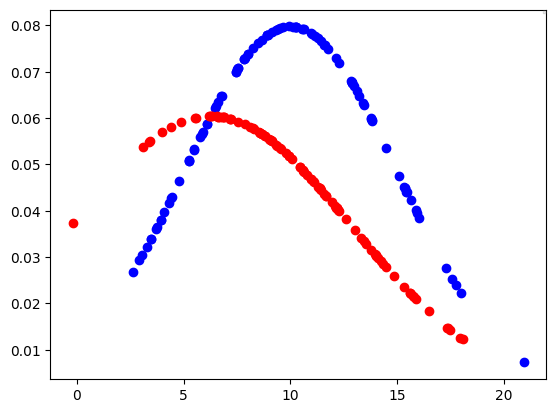

In [5]:
from matplotlib import pyplot as plt
plt.figure()
plt.legend(fontsize=2)
plt.scatter(data, y, c='b', label="REAL DATA")
plt.scatter(data_pre, y_pred, c='r', label="DATA CREATED BY PREDICTED")
plt.title = "Maximum likelihood estimation"
plt.show()